In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
netflix_revenue= pd.read_csv("netflix_revenue_updated.csv")
# print(netflix_revenue.head())
# print(netflix_revenue.columns)

In [22]:
# Dropping columns I don't need for the heatmap
new_netflix = netflix_revenue.drop(columns=['Date','Global Revenue','Netflix Streaming Memberships '])
# print(new_netflix.columns)

In [5]:
# Further refining of data, I don't need the Members numbers for now
region_revenue_arpu = new_netflix[['UCAN Streaming Revenue','EMEA Streaming Revenue','LATM Streaming Revenue','APAC Streaming Revenue','UCAN ARPU','EMEA ARPU','LATM  ARPU','APAC  ARPU']]
                                                                                                               

In [6]:
# Creating a correlation matrix
correlation = region_revenue_arpu.corr()
# print(correlation)

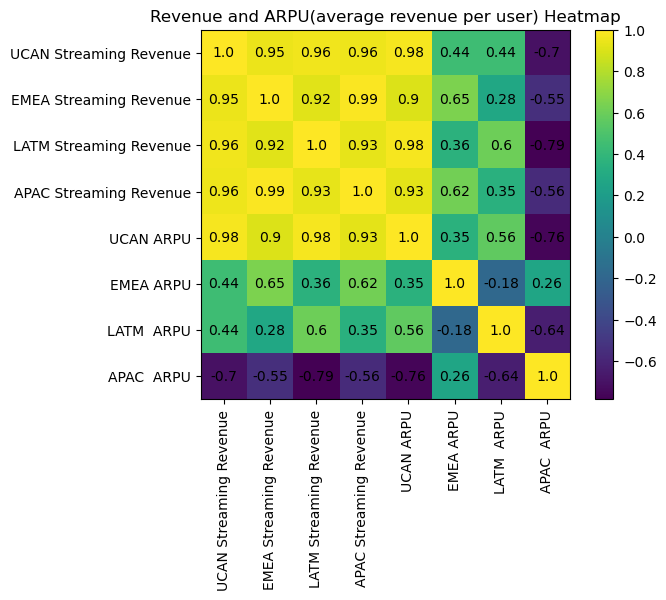

In [13]:
plt.imshow(correlation)
for i in range(len(correlation)):
    for j in range(len(correlation)):
        plt.text(j, i, round(correlation.iloc[i, j], 2), ha='center', va='center', color='black')
plt.title('Revenue and ARPU(average revenue per user) Heatmap')
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=90)
plt.yticks(range(len(correlation.index)), correlation.index)
plt.colorbar()
plt.show()

If ARPU is increasing, it can suggest that the business is successfully selling more or higher-priced products/services per user. However, if total revenue doesn’t follow, it may point to market saturation or challenges in acquiring new users.
There is a moderate negative correlation for the APAC(Asia-Pacific) area which may point to the fact that remaining customers spend more, but the price senstive customers leave and subscription price changes are causing a higher churn rate, higher inclination to share accounts so more money spent on infrastructure?

## Let's look at the heatmap of Members and ARPU and see of we can get more insights in the previously mentioned negative correlation

In [16]:
member_arpu = new_netflix[['UCAN ARPU','EMEA ARPU','LATM  ARPU','APAC  ARPU','UCAN Members','EMEA  Members','LATM Members','APAC Members']]
# print(member_arpu.head())

In [18]:
member_correlation = member_arpu.corr()

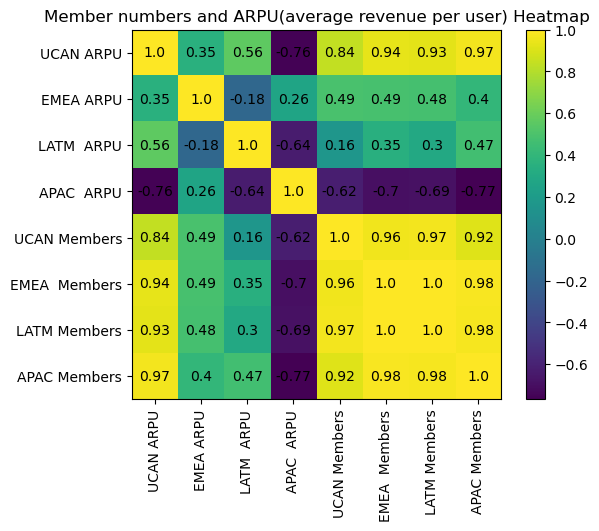

In [21]:
plt.imshow(member_correlation)
for i in range(len(member_correlation)):
    for j in range(len(member_correlation)):
        plt.text(j, i, round(member_correlation.iloc[i, j], 2), ha='center', va='center', color='black')
plt.title('Member numbers and ARPU(average revenue per user) Heatmap')
plt.xticks(range(len(member_correlation.columns)), member_correlation.columns, rotation=90)
plt.yticks(range(len(member_correlation.index)), member_correlation.index)
plt.colorbar()
plt.show()

Again we have a strong negative correlation between APAC members and APAC ARPU. Could this be showing a strategy wherein in order to attract members, Netflix is decreasing prices in the Asia Pacific region? Are the member numbers high because they account for free Netlfix trials? Partnerships with for example a pizza chain, order x amounts of pizza and get 3 months of free Netflix?